In [67]:
import pandas as pd
from sklearn import preprocessing
import sklearn
import sklearn.model_selection

import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
names = ['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

data = pd.read_csv("adult.csv",header = None)
data.columns = names
data.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [69]:
import numpy as np
data = data.replace(" ?", np.nan).dropna(axis=0)

In [70]:
le = preprocessing.LabelEncoder()

In [71]:
data['Workclass'] = le.fit_transform(list(data['Workclass']))
data['Education'] = le.fit_transform(list(data['Education']))
data['marital_status'] = le.fit_transform(list(data['marital_status']))
data['occupation'] = le.fit_transform(list(data['occupation']))
data['relationship'] = le.fit_transform(list(data['relationship']))
data['race'] = le.fit_transform(list(data['race']))
data['sex'] = le.fit_transform(list(data['sex']))
data['native_country'] = le.fit_transform(list(data['native_country']))
data['income'] = le.fit_transform(list(data['income']))

incomex = [" <=50K"," >50K"]

In [72]:
data['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [73]:
X = data.drop('income',axis='columns')
y = data['income']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((21113, 14), (9049, 14))

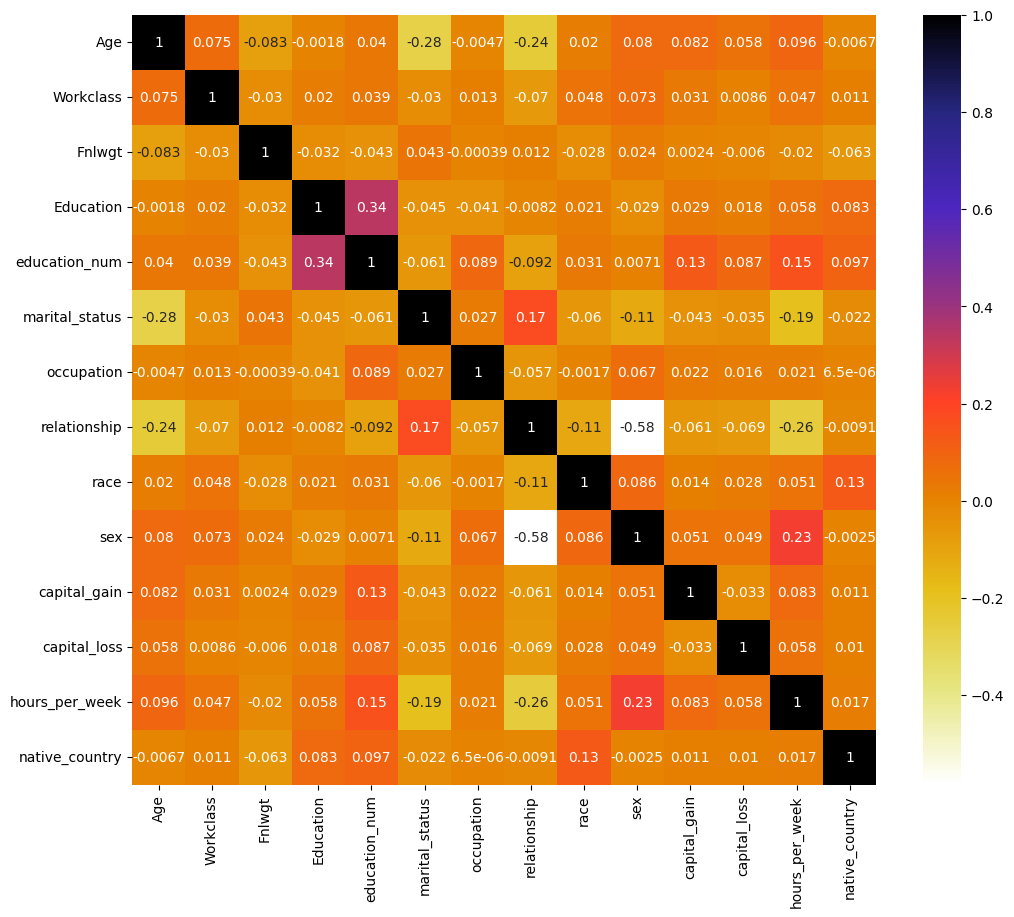

In [75]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


#### Not removing any columns since there is no much correlation between the independent values 

In [79]:
data['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [80]:
X = data.drop('income',axis='columns')
y = data['income']

In [81]:
X.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4


In [82]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    22654
1    22654
Name: income, dtype: int64

In [83]:
x_train ,  x_test  ,y_train , y_test = sklearn.model_selection.train_test_split(X_sm,y_sm, test_size = 0.2, stratify=y_sm)

# Decision Tree Classifier

In [84]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
import seaborn as sns



In [85]:
model = tree.DecisionTreeClassifier()
X = x_train.values

In [86]:

model.fit(X, y_train)
model.score(X, y_train)

1.0

In [87]:
p = 0
f = 0

for num in range(len(x_test)):
    pre = model.predict([x_test.iloc[num]])
    if (pre[0] == y_test.iloc[num]):

        p+=1
    else:
        f+=1
print("Match cases: ",p)
print("Mismatch case",f)

print("Accuracy : ",p/(p+f)*100)

Match cases:  7757
Mismatch case 1305
Accuracy :  85.59920547340542


In [88]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (7,5), fontsize=14):
   
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [89]:
truth =      []
prediction = []

for num in range(len(y_test)):
    pre = model.predict([x_test.iloc[num]])
    
    truth.append(incomex[y_test.iloc[num]])    
    prediction.append(incomex[pre[0]] )   

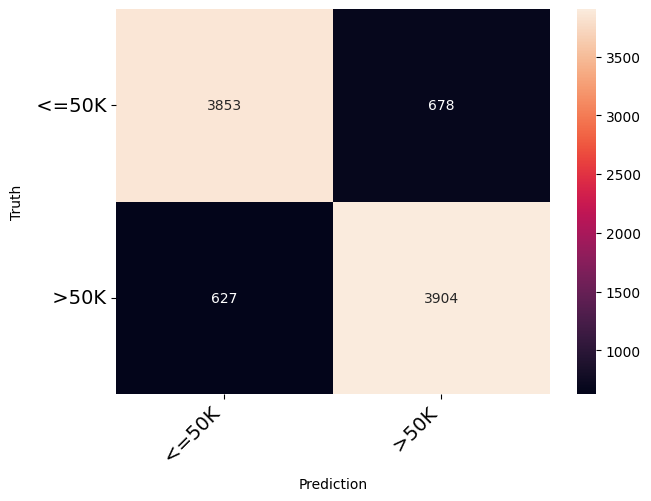

In [90]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,[' <=50K', ' >50K'])

In [91]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

       <=50K       0.86      0.85      0.86      4531
        >50K       0.85      0.86      0.86      4531

    accuracy                           0.86      9062
   macro avg       0.86      0.86      0.86      9062
weighted avg       0.86      0.86      0.86      9062



In [92]:
Misclassification = (cm[1][0]+cm[0][1])/np.sum(cm)
print("Misclassification percentage : ",Misclassification*100)

Misclassification percentage :  14.40079452659457


# Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier()

In [94]:
model.fit(X, y_train)
model.score(X, y_train)

1.0

In [95]:
p = 0
f = 0

for num in range(len(x_test)):
    pre = model.predict([x_test.iloc[num]])
    if (pre[0] == y_test.iloc[num]):

        p+=1
    else:
        f+=1
print("Match cases: ",p)
print("Mismatch case",f)

print("Accuracy : ",p/(p+f)*100)

Match cases:  8134
Mismatch case 928
Accuracy :  89.75943500331053


In [96]:
truth =      []
prediction = []

for num in range(len(y_test)):
    pre = model.predict([x_test.iloc[num]])
    truth.append(incomex[y_test.iloc[num]])    
    prediction.append(incomex[pre[0]] )   

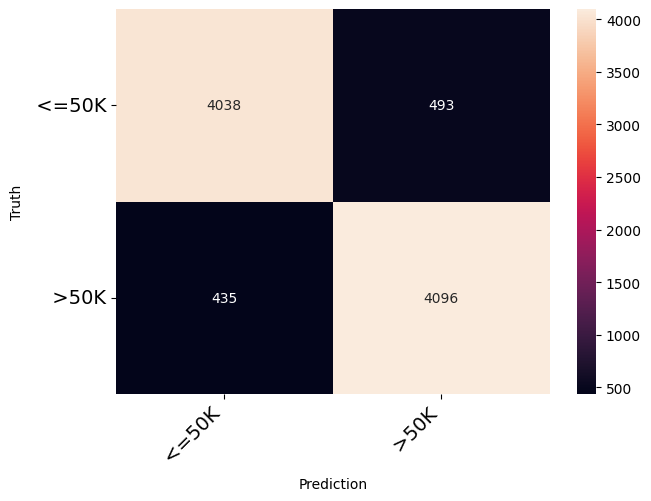

In [97]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,[' <=50K', ' >50K'])

In [98]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

       <=50K       0.90      0.89      0.90      4531
        >50K       0.89      0.90      0.90      4531

    accuracy                           0.90      9062
   macro avg       0.90      0.90      0.90      9062
weighted avg       0.90      0.90      0.90      9062



In [99]:
Misclassification = (cm[1][0]+cm[0][1])/np.sum(cm)
print("Misclassification percentage : ",Misclassification*100)

Misclassification percentage :  10.240564996689471


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pickle
best = 0

 
for _ in range(1000):
   
    x_train ,  x_test  ,y_train , y_test = sklearn.model_selection.train_test_split(X_sm,y_sm, test_size = 0.2, stratify=y_sm)
    X = x_train.values
    model = make_pipeline(StandardScaler(), LogisticRegression())   
    model.fit(X, y_train)
    acc = model.score(X, y_train)
    
    if acc > best:
        best = acc
        print(acc)
        with open("LOGIC_REG_MODEL.pickle",'wb') as f:
            pickle.dump(model, f)

0.7729404623958506
0.7738509076863654
0.7745682282182862
0.7755338520112565
0.7756166197649396
0.7760580477845831


In [34]:
temp = open("LOGIC_REG_MODEL.pickle",'rb')
model = pickle.load(temp)

In [35]:
model.score(X, y_train)

0.7730508194007615

In [36]:
p = 0
f = 0

for num in range(len(x_test)):
    pre = model.predict([x_test.iloc[num]])
    if (pre[0] == y_test.iloc[num]):

        p+=1
    else:
        f+=1
print("Match cases: ",p)
print("Mismatch case",f)

print("Accuracy : ",p/(p+f)*100)

Match cases:  6993
Mismatch case 2069
Accuracy :  77.16839549768262


In [37]:
truth =      []
prediction = []

for num in range(len(y_test)):
    pre = model.predict([x_test.iloc[num]])
    truth.append(incomex[y_test.iloc[num]])    
    prediction.append(incomex[pre[0]] )   

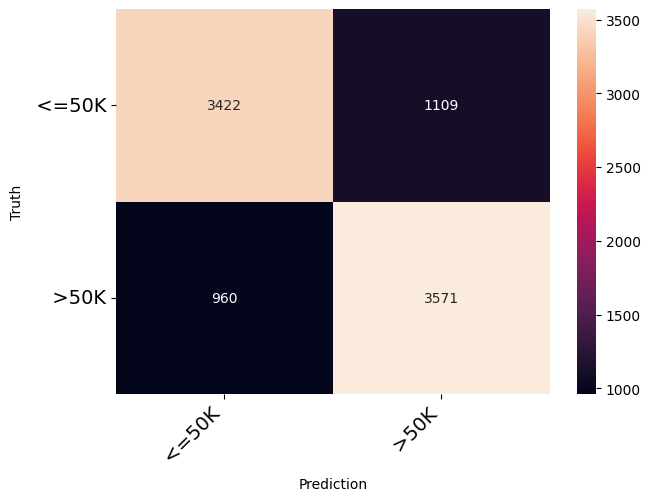

In [38]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,[' <=50K', ' >50K'])

In [39]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

       <=50K       0.78      0.76      0.77      4531
        >50K       0.76      0.79      0.78      4531

    accuracy                           0.77      9062
   macro avg       0.77      0.77      0.77      9062
weighted avg       0.77      0.77      0.77      9062



In [40]:
Misclassification = (cm[1][0]+cm[0][1])/np.sum(cm)
print("Misclassification percentage : ",Misclassification*100)

Misclassification percentage :  22.83160450231737


# KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [42]:
best  = 0
for _ in range(100):
    x_train ,  x_test  ,y_train , y_test = sklearn.model_selection.train_test_split(X_sm,y_sm, test_size = 0.2, stratify=y_sm)
    model = KNeighborsClassifier()
    X = x_train.values
    
    model.fit(X, y_train)
    acc = model.score(X, y_train)
    
    if acc > best:
        best = acc
        print(acc)
        with open("KNN_MODEL.pickle",'wb') as f:
            pickle.dump(model, f)

0.8139932682227005
0.8144898747447994
0.8155106770402252
0.8157865695525024
0.8165314793356508
0.8170004966065221


In [43]:
temp = open("KNN_MODEL.pickle",'rb')
model = pickle.load(temp)

In [44]:
truth =      []
prediction = []

for num in range(len(y_test)):
    pre = model.predict([x_test.iloc[num]])
    truth.append(incomex[y_test.iloc[num]])    
    prediction.append(incomex[pre[0]] )   

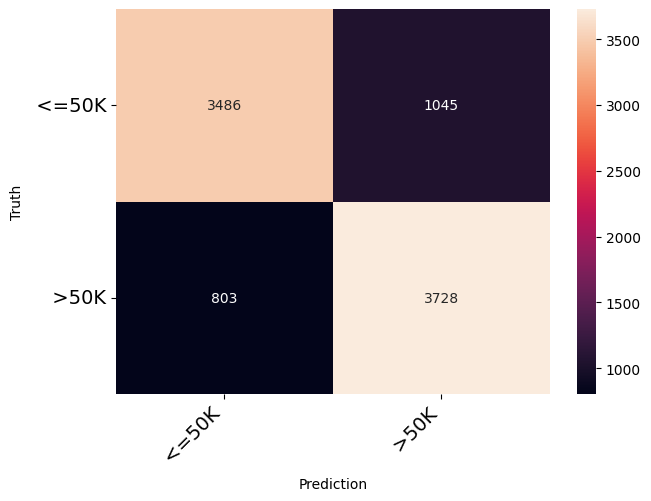

In [45]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,[' <=50K', ' >50K'])

In [46]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

       <=50K       0.81      0.77      0.79      4531
        >50K       0.78      0.82      0.80      4531

    accuracy                           0.80      9062
   macro avg       0.80      0.80      0.80      9062
weighted avg       0.80      0.80      0.80      9062



In [47]:
Misclassification = (cm[1][0]+cm[0][1])/np.sum(cm)
print("Misclassification percentage : ",Misclassification*100)

Misclassification percentage :  20.392849260648862


# SVC Classifier (with linear kernel)

In [48]:
from sklearn import svm

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)

scaling1 = MinMaxScaler(feature_range=(-1,1)).fit(x_test)


x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)


In [50]:
model = svm.SVC(kernel  = "linear", C = 2) 
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7807327300816597

In [51]:
model.score(x_test,y_test)

0.7807327300816597

In [52]:
truth =      []
prediction = []

for num in range(len(y_test)): 
    
    pre = model.predict([x_test[num]])
    truth.append(incomex[y_test.iloc[num]])    
    prediction.append(incomex[pre[0]] )

In [53]:
predictions   = model.predict(x_test)

In [54]:
p = 0
f = 0

for num in range(len(x_test)):
    pre = model.predict([x_test[num]])
    if (pre[0] == y_test.iloc[num]):

        p+=1
    else:
        f+=1
print("Match cases: ",p)
print("Mismatch case",f)

print("Accuracy : ",p/(p+f)*100)

Match cases:  7075
Mismatch case 1987
Accuracy :  78.07327300816597


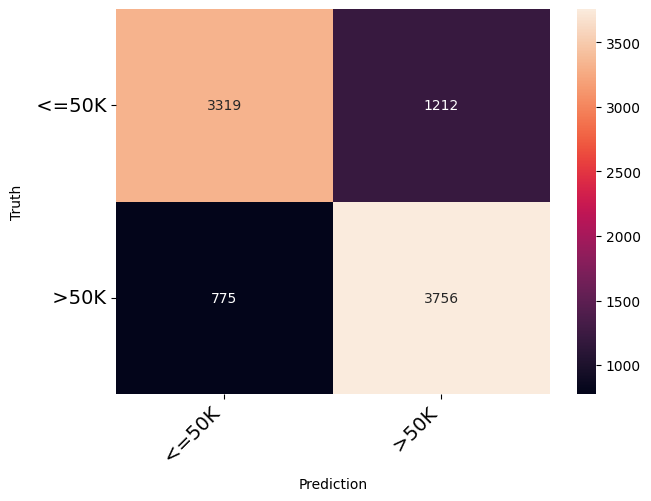

In [55]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,[' <=50K', ' >50K'])

In [56]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

       <=50K       0.81      0.73      0.77      4531
        >50K       0.76      0.83      0.79      4531

    accuracy                           0.78      9062
   macro avg       0.78      0.78      0.78      9062
weighted avg       0.78      0.78      0.78      9062



In [57]:
Misclassification = (cm[1][0]+cm[0][1])/np.sum(cm)
print("Misclassification percentage : ",Misclassification*100)

Misclassification percentage :  21.926726991834034


# Report the model with the best accuracy.

#### The best model for the give data set can be trained using Random Forest Classifier

##### Accuracy :  89.759

                  precision    recall  f1-score   support
       <=50K        0.90      0.89      0.90      4531
        >50K        0.89      0.90      0.90      4531

###### Misclassification percentage :  10.24%